# Classical Image Processing

In this tutorial we will review some existing classical image processing algorithms. 

Image processing has been around since the mid 20th century. Since its early beginnings it has been expanded from simple image enhancement techniques to pattern recognition, transformation, and machine learning. Its uses span many domains such as medical imaging, cryptanalysis, gaming, weather, construction, and traffic analysis.
In this section we will review a few of these classical techniques to serve as a brief introduction to the various image processing techniques and will help understand the differences as to how images are represented and transformed. 


We will be using the **skimage** library to perform a lot of the image processing for us. But first, let's discuss a bit about how images are digitally represented and rendered.

An image is made up of pixels, where each pixel represents as either binary, grayscale, or color. An image can contain any number of pixels and in any configuration. An image can be represented as a square nxn image, or an nxm image, where n and m are integers representing the number of rows and columns of the image.

A binary image is represented by a single bit for each pixel, where the bit has a value of either 0 or 1. Where 0 represents the color Black, and 1 represents the color White.

A grayscale image is represented by 8 bits for each pixel, where the bits have gray scaled values between 0 and 255. Where 0 is Black and 255 is White, and all the colors in between intensify the grayscale values as the value increases. 

In the following sections we will perform some common operations to various binary, grayscale, and color images. The operations will be as simple as just reading in a image and converting it from color to grayscale, and other operations such as feature and edge detection. For simplicity we will be using the skiimage library to perform some of these tasks for us. 

## Contents
1. Reading and Transforming an Image     
    1.1 Converting From Color to Grayscale    
    1.2 Blurring     
    1.3 Resizing    
2. Edge Detection     
    2.1 Canny    
    2.2 Roberts    
    2.3 Sobel    
3. Thresholding    

## 1. Reading and Transforming an Image
Reading in an image is as simple as reading in a text file. In these example we'll read in various sample images included in the **skimage** library. 
In this example we will read in a color image and display it using Python pyplot.

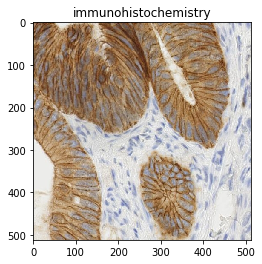

In [1]:
import matplotlib.pyplot as plt
import matplotlib

# Load skimage library
from skimage import data

# Other sample images available: 'hubble_deep_field', 'astronaut', 'retina'
image_name = 'immunohistochemistry'

# Load image
caller = getattr(data, image_name)
image = caller()

# Plot and display image
plt.figure()
plt.title(image_name)
plt.imshow(image)
plt.show()

### 1.1 Convert a Color Image to Grayscale
There are many ways to convert an image from color to grayscale. Since grayscale colors are generally stored as 8-bit values and color images are stored as 24 bit values (8-bits per color - Red, Green, and Blue), this means that the conversion must reduce to the 8-bit grayscale representation. The general way to do this is by simply averaging the three color values: 

Grayscale image = $\frac{Red(8bit) + Green(8bit) + Blue(8bit)}3$

This is commonly referred to as _downsampling_ an image. 
Luckily for us we won't have to write our code to traverse each pixel as skimage already has a method, _rgb2gray_ , built to do that for us.

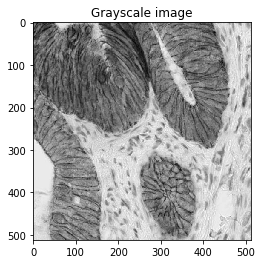

In [2]:
from skimage.color import rgb2gray

# Convert color to grayscale image
grayscale_image = rgb2gray(image)

# Plot and show grayscaled image
plt.figure()
plt.title('Grayscale image')
plt.imshow(grayscale_image, cmap=plt.cm.gray)
plt.show()

### 1.2 Tinting an Image
If you ever need to highlight a portion of an image you can do so by tinting an image by scaling the color values of each pixel to various degrees of color. In the folloiwing example we will scale the color image by defining the color weight to apply, in this case we will apply a pure red so we will clear out the blue and green values. 

**Note** The color values are oredered [Red, Green, Blue].

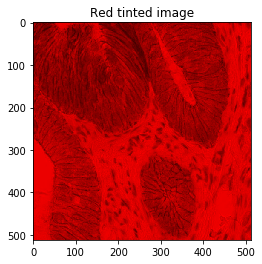

In [3]:
# Tint images
from skimage import color
from skimage import img_as_float

# Define the color weight scale to red, [Red, Green, Blue]
red_tinting = [1, 0, 0]

# Plot and show image
plt.figure()
plt.title('Red tinted image')
plt.imshow(red_tinting * image)
plt.show()

## 2. Image Edge Detection
One of the most commonly used feature in image processing is edge detection. Detecting and extracting the edges of an image can be used identify and segment objects within an image. Use of this feature can also be found in areas outside of image processing such as computer vision and machine learning. 

The following are some of the more popular edge detection techniques available. 

### 2.1 Canny Edge Detector
The Canny edge detector is an image operator that performs multiple stages to maximize the detection of edges while providing a means to adjust the operator so the results can be fine tuned as needed. 
The Canny edge detector steps are described in [http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.420.3300&rep=rep1&type=pdf] and [http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.476.5736&rep=rep1&type=pdf]

Generally the steps as described in the skimage Canny implementation [https://scikit-image.org/docs/stable/auto_examples/edges/plot_canny.html] are as follows: 
1. Apply Gaussian filter to blur the image. This will smooth the edges to easily detect edges by reducing the noise in the image. 
2. Thinning of the edges down to by removing non-maximum pixels of the image gradient. 
3. Apply a threshold to remove using hysteresis on the graudient magnitude

In the following example we will use the Canny filter to detect the edges of our grayscaled image.

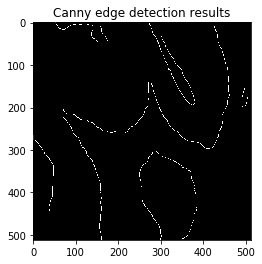

In [4]:
from scipy import ndimage as ndi

from skimage import feature

# Compute the Canny filter
canny = feature.canny(grayscale_image, sigma=5)

# Plot and show the image
plt.figure()
plt.title('Canny edge detection results')
plt.imshow(canny, cmap=plt.cm.gray)
plt.show()

### 2.2 Roberts Cross Edge Detection
This is used to detect the edge of an image using a diagonal mask which is used to approximate the gradient by computing the sum of the squares and the differences between diagonal pixels. 
skimage implements a Roberts Cross edge detector by providing it a 2D image and it returns a 2D map array of the Roberts' cross edge. The convolution matrices used to implement Roberts' cross filter are as follows: 

$
S_{left} = 
\begin{bmatrix}
+1 & 0 \\
0 & -1 
\end{bmatrix}$

$
S_{right} = 
\begin{bmatrix}
0 & +1 \\
-1 & 0 
\end{bmatrix}$

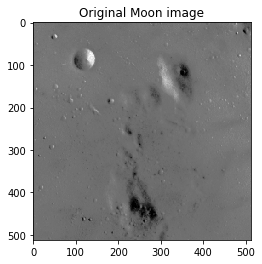

In [5]:
# Import the filter library
from skimage import filters

# Load the test image
caller = getattr(data, 'moon')
image = caller()
grayscale_image = rgb2gray(image)

# Plot and show the original image
plt.title('Original Moon image')
plt.imshow(grayscale_image, cmap=plt.cm.gray)
plt.show()

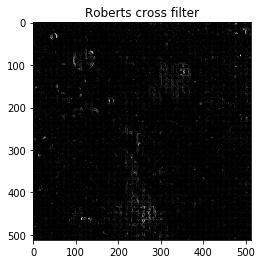

In [6]:
# Apply the Roberts cross filter
roberts_filter = filters.roberts(grayscale_image)

# Plot and show image
plt.title('Roberts cross filter')
plt.imshow(roberts_filter, cmap=plt.cm.gray)
plt.show()

### 2.3 Sobel Edge Detection
The Sobel filter, similar to Roberts cross filter above is used to detect edges, however Sobel uses two 3x3 kernels to approximate the derivates of the horizontal and vertical changes.  A standard example of Sobel's filter are as follows for the vertical and horizontal, respectively. 

$
S_{vertical} = 
\begin{bmatrix}
+1 & 0 & -1 \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix}$

$
S_{horizontal} = 
\begin{bmatrix}
+1 & +2 & +1 \\
0 & 0 & 0 \\
-1 & -2 & -1 
\end{bmatrix}$


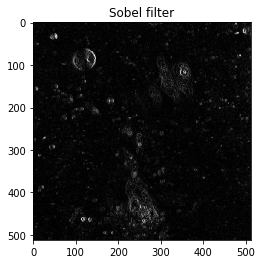

In [7]:
# Apply Sobel filter to the grayscale image
sobel_filter = filters.sobel(grayscale_image)

# Plot and show image
plt.title('Sobel filter')
plt.imshow(sobel_filter, cmap=plt.cm.gray)
plt.show()

## 3. Thresholding
Thresholding an image is a way to convert a grayscale image to a binary image. 
The skimage implements the Otsu's method of thresholding [https://en.wikipedia.org/wiki/Otsu's_method] which returns threshold value given a grayscaled image. 
The image is then converted into a binary image by classifying all pixels into one of the two binary states 0 or 1. The classification of each pixel to one of these two states is determined by the threshold value. 

Therefore, any pixel value less than the threshold value is set to 0, all others pixel values are set to 1. 

$
\begin{equation}
  \text{Pixel value} =
  \begin{cases}
    0 & \text{if pixel value is less than threshold} \\
    1 & \text{otherwise}
  \end{cases}
\end{equation}$



In this next example we will obtain the threshold value using Otsu's method and apply that threshold value to a grayscaled image in order to covert it to a binary image. 

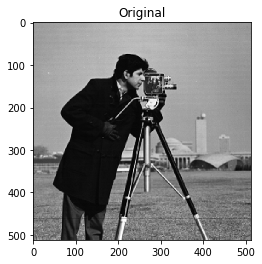

In [8]:
# Load grayscaled image
image = data.camera()
grayscale_image = rgb2gray(image)

plt.figure()
plt.title('Original')
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

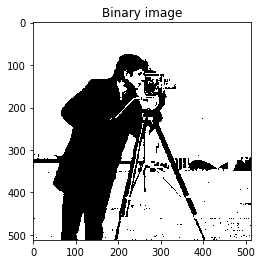

In [9]:
# import Otsu's threshold method
from skimage.filters import threshold_otsu

# Obtain threshold value
tr = threshold_otsu(grayscale_image)

# Apply threshold to convert to binary
binary_image = grayscale_image > tr

plt.figure()
plt.title('Binary image')
plt.imshow(binary_image, cmap=plt.cm.gray)
plt.show()